In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
# read data
train = pd.read_pickle( r'C:\Users\faith\OneDrive\Documents\FaithZhang\SURF\RealTimeDetection\training\train_set.pkl')
test = pd.read_pickle( r'C:\Users\faith\OneDrive\Documents\FaithZhang\SURF\RealTimeDetection\testing\test_set.pkl')

In [4]:
model_path = 'newAGmodels/daily_target_accuracy'

predictor = TabularPredictor( label = 'AKI_in_24', path = model_path   )
predictions= predictor.fit(
                 train.drop( columns = ['hadm_id']),
                #  ag_args_fit = {'num_gpus':1}, # comment out this line if no GPU used
                #  presets = 'best_quality', # if too small, comment out this line, results can be worse
                 num_stack_levels = 1,
                 num_bag_folds = 5,
                 #time_limit = 21600;
                 hyperparameters = {
                        'NN_TORCH': {},
                        'GBM': [
                            {},
                            {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
                            'GBMLarge',
                        ],
                        'CAT': {},
                        'XGB': {},
                        'FASTAI': {},
                        'RF': [
                            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
                        ],
                        'XT': [
                            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
                        ],
                        'KNN':[
                            {'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}, 'n_jobs': 16}, # if BLAS error
                            {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}, 'n_jobs': 16}, # set smaller 'n_jobs'
                        ],
                         'LR': [
                             {'penalty': 'L2', 'ag_args':{'name_suffix':'L2'}},
                             {'penalty': 'L1', 'ag_args':{'name_suffix':'L1'}},
                         ]
                    }
                 )

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
Memory Avail:       4.98 GB / 31.67 GB (15.7%)
Disk Space Avail:   82.00 GB / 474.72 GB (17.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
	Consider setting `time_limit` to ensure training finishes within an expe

In [31]:
model_path = 'newAGmodels/daily_target_balanced_accuracy'

predictor = TabularPredictor( label = 'AKI_in_24', path = model_path, eval_metric = 'balanced_accuracy'  ).fit(
                 train.drop( columns = ['hadm_id']),
                #  ag_args_fit = {'num_gpus':1}, # comment out this line if no GPU used
                #  presets = 'best_quality', # if too small, comment out this line, results can be worse
                 num_stack_levels = 1,
                 num_bag_folds = 5,
                 #time_limit = 21600;
                 hyperparameters = {
                        'NN_TORCH': {},
                        'GBM': [
                            {},
                            {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
                            'GBMLarge',
                        ],
                        'CAT': {},
                        'XGB': {},
                        'FASTAI': {},
                        'RF': [
                            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
                        ],
                        'XT': [
                            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
                        ],
                        'KNN':[
                            {'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}, 'n_jobs': 16}, # if BLAS error
                            {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}, 'n_jobs': 16}, # set smaller 'n_jobs'
                        ],
                         'LR': [
                             {'penalty': 'L2', 'ag_args':{'name_suffix':'L2'}},
                             {'penalty': 'L1', 'ag_args':{'name_suffix':'L1'}},
                         ]
                    }
                 )

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "newAGmodels/daily_target_balanced_accuracy"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3

In [ ]:
model_path = 'newAGmodels/daily_target_roc_auc'

predictor = TabularPredictor( label = 'AKI_in_24', path = model_path, eval_metric = 'roc_auc'  ).fit(
                 train.drop( columns = ['hadm_id']),
                 ag_args_fit = {'num_gpus':1}, # comment out this line if no GPU used
                 presets = 'best_quality', # if too small, comment out this line, results can be worse
                 num_stack_levels = 1,
                 num_bag_folds = 5,
                 #time_limit = 21600;
                 hyperparameters = {
                        'NN': {},
                        'GBM': [
                            {},
                            {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
                            'GBMLarge',
                        ],
                        'CAT': {},
                        'XGB': {},
                        'FASTAI': {},
                        'RF': [
                            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
                        ],
                        'XT': [
                            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
                            {'criterion': 'mse', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
                        ],
                        'KNN':[
                            {'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}, 'n_jobs': 16}, # if BLAS error
                            {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}, 'n_jobs': 16}, # set smaller 'n_jobs'
                        ],
                         'LR': [
                             {'penalty': 'L2', 'ag_args':{'name_suffix':'L2'}},
                             {'penalty': 'L1', 'ag_args':{'name_suffix':'L1'}},
                         ]
                    }
                 )

## the thing below is not important
## usd for see quick results

In [3]:
# predict
predictor = TabularPredictor.load("./newAGmodels/daily_target_accuracy/")
predictor

Found 1 mismatches between original and current metadata:


AssertionError: Predictor was created on Python version 3.9 but is being loaded with Python version 3.8. Please ensure the versions match to avoid instability. While it is NOT recommended, this error can be bypassed by specifying `require_py_version_match=False`.

In [20]:
predictor.evaluate(test)

c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: invalid value encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: divide by zero encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: invalid value encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: divide by zero encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:1

{'accuracy': 0.8110063193525052,
 'balanced_accuracy': 0.7773281813618239,
 'mcc': 0.5866724612275327,
 'roc_auc': 0.8663070328684084,
 'f1': 0.7177710290850539,
 'precision': 0.8084481175390267,
 'recall': 0.6453835721878093}

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.roc_auc_score(train['AKI_in_24'], risk[1] )

0.9997824300149881

In [9]:
predictor.evaluate(  train.drop( columns = ['hadm_id']) , silent = True)

c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: divide by zero encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: invalid value encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: divide by zero encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:182: RuntimeWarning: invalid value encountered in divide
  (X[self.cont_columns].values - cont_mean) / cont_std,
c:\Users\faith\anaconda3\envs\myenv\lib\site-packages\autogluon\tabular\models\fastainn\tabular_nn_fastai.py:1

{'accuracy': 0.9962231759656652,
 'balanced_accuracy': 0.9954176969880638,
 'mcc': 0.9920189816591991,
 'roc_auc': 0.9996919627703612,
 'f1': 0.9950650515926425,
 'precision': 0.9981998199819982,
 'recall': 0.9919499105545617}

In [ ]:
predictor.leaderboard( test.drop( ['time', 'hadm_id'], axis = 1) , silent = True, extra_metrics = [ 'roc_auc' ])

,model,score_test,roc_auc,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L1,0.819905,0.869520,0.823348,27.723558,0.358952,21.297952,27.723558,0.358952,21.297952,1,True,11
1,LightGBM_BAG_L1,0.819755,0.869575,0.824549,9.561357,0.414303,16.543365,9.561357,0.414303,16.543365,1,True,3
2,WeightedEnsemble_L2,0.819755,0.869575,0.824549,9.565902,0.422198,18.761497,0.004545,0.007896,2.218132,2,True,15
3,CatBoost_BAG_L2,0.818827,0.871122,0.828155,421.491698,21.722955,486.113601,3.031690,0.371753,23.697541,2,True,20
4,RandomForestEntr_BAG_L2,0.818800,0.864856,0.820773,421.119864,23.828730,463.575208,2.659856,2.477527,1.159147,2,True,19
5,WeightedEnsemble_L3,0.818404,0.868920,0.829700,445.315997,28.272141,492.626752,0.006124,0.007249,1.708628,3,True,28
6,LightGBMXT_BAG_L2,0.818349,0.868809,0.828326,428.349304,21.618500,473.952188,9.889296,0.267297,11.536127,2,True,17
7,XGBoost_BAG_L2,0.817776,0.867569,0.825579,446.923717,21.658121,476.442516,28.463709,0.306918,14.026455,2,True,24
8,ExtraTreesGini_BAG_L2,0.817694,0.861848,0.819571,420.328969,23.509512,463.570710,1.868962,2.158309,1.154649,2,True,21
9,LightGBMLarge_BAG_L1,0.816780,0.864842,0.823519,13.041126,0.516203,70.416667,13.041126,0.516203,70.416667,1,True,14


In [ ]:
predictor.evaluate( test.drop( ['time', 'hadm_id'], axis = 1) , silent = True)

{'accuracy': 0.8184039199093726,
 'balanced_accuracy': 0.7800006356639448,
 'mcc': 0.6069489468613851,
 'roc_auc': 0.8689202726608448,
 'f1': 0.7213437493455086,
 'precision': 0.8523559691150268,
 'recall': 0.6252405329847874}

In [ ]:
# read predictor
predictor = TabularPredictor.load("auto_gluonModels/ag_AKI_in_24/")
inform = pd.read_pickle('./testing/inform.pkl')

In [ ]:
time_list = np.unique( test['time'] )

In [ ]:
# this took too long to run in the notebook;
# so run it in .py form
# results saved as time_records_table.pkl

time_records_table = pd.DataFrame( columns = ['time', 'accuracy', 'balanced_accuracy', 'roc_auc',
                                              'f1', 'precision', 'recall', 'NumOfPatients', 'NumOfAKI',
                                              'RatioOfAKI'] )

for time_id in tqdm(time_list):
    time_test_table = test.loc[ test['time'] == time_id ].drop( ['time', 'hadm_id'], axis = 1)
    if len(np.unique(test.loc[ test['time'] == time_id, 'AKI_in_24' ])) == 1:
        break
    tv_eva = predictor.evaluate( time_test_table  , silent = True)
    add_table = pd.DataFrame( data =  np.array([ time_id, tv_eva['accuracy'], tv_eva['balanced_accuracy'], tv_eva['roc_auc'], tv_eva['f1'], tv_eva['precision'], 
                     tv_eva['recall'], len(time_test_table), time_test_table['AKI_in_24'].sum(), time_test_table['AKI_in_24'].sum()/len(time_test_table) ]).reshape([1,-1]),
                                columns = time_records_table.columns.values)
    time_records_table = pd.concat( [time_records_table, add_table], ignore_index = True)
    
time_records_table.to_pickle('time_records_table.pkl')

  2%|▏         | 16/972 [08:45<8:33:13, 32.21s/it]

In [ ]:
time_records_table = pd.read_pickle('time_records_table.pkl')


In [ ]:
time_records_table

,time,accuracy,balanced_accuracy,roc_auc,f1,precision,recall,NumOfPatients,NumOfAKI,RatioOfAKI
0,0.0,0.866284,0.505188,0.437082,0.023952,0.500000,0.012270,1219.0,163.0,0.133716
1,1.0,0.861526,0.516199,0.554117,0.067039,0.666667,0.035294,1206.0,170.0,0.140962
2,2.0,0.851790,0.535554,0.633566,0.144231,0.555556,0.082873,1201.0,181.0,0.150708
3,3.0,0.832916,0.541299,0.672340,0.173554,0.466667,0.106599,1197.0,197.0,0.164578
4,4.0,0.829289,0.560841,0.702361,0.233083,0.534483,0.149038,1195.0,208.0,0.174059
...,...,...,...,...,...,...,...,...,...,...
497,497.0,0.833333,0.750000,1.000000,0.888889,0.800000,1.000000,6.0,4.0,0.666667
498,498.0,0.833333,0.750000,1.000000,0.888889,0.800000,1.000000,6.0,4.0,0.666667
499,499.0,0.666667,0.400000,0.800000,0.800000,0.800000,0.800000,6.0,5.0,0.833333
500,500.0,0.666667,0.400000,0.800000,0.800000,0.800000,0.800000,6.0,5.0,0.833333


In [ ]:
import matplotlib.pyplot as plt


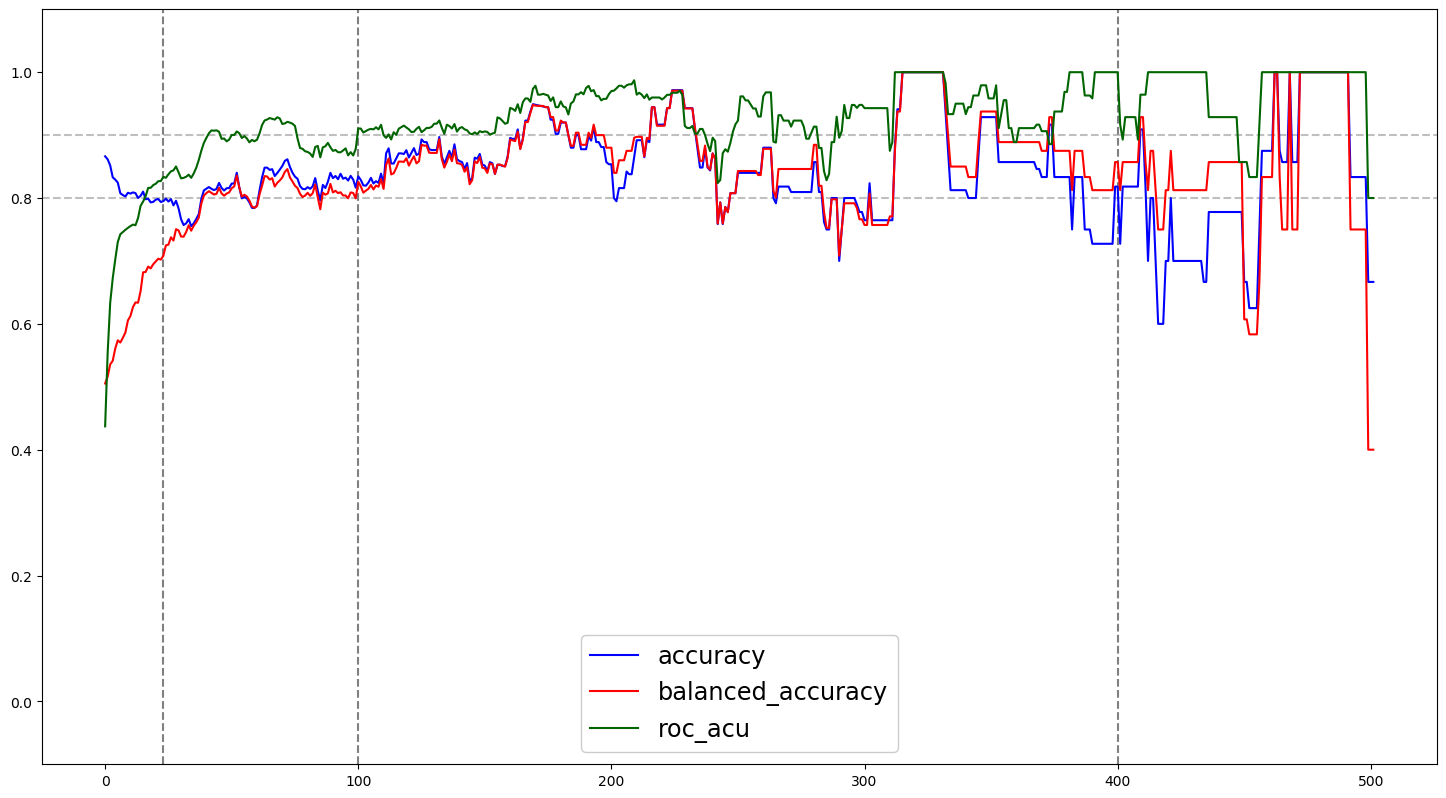

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axhline( y = 0.9 ,color = 'gray', linestyle = '--', alpha = 0.5)
axs.axhline( y = 0.8 ,color = 'gray', linestyle = '--', alpha = 0.5)

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['accuracy'], color = 'blue', label = 'accuracy')
axs.plot( time_records_table['time'], time_records_table['balanced_accuracy'], color = 'red', label = 'balanced_accuracy')
axs.plot( time_records_table['time'], time_records_table['roc_auc'], color = 'darkgreen', label = 'roc_acu')
axs.legend( loc = 'lower center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/accroc.png', dpi = 100, bbox_inches = 'tight')


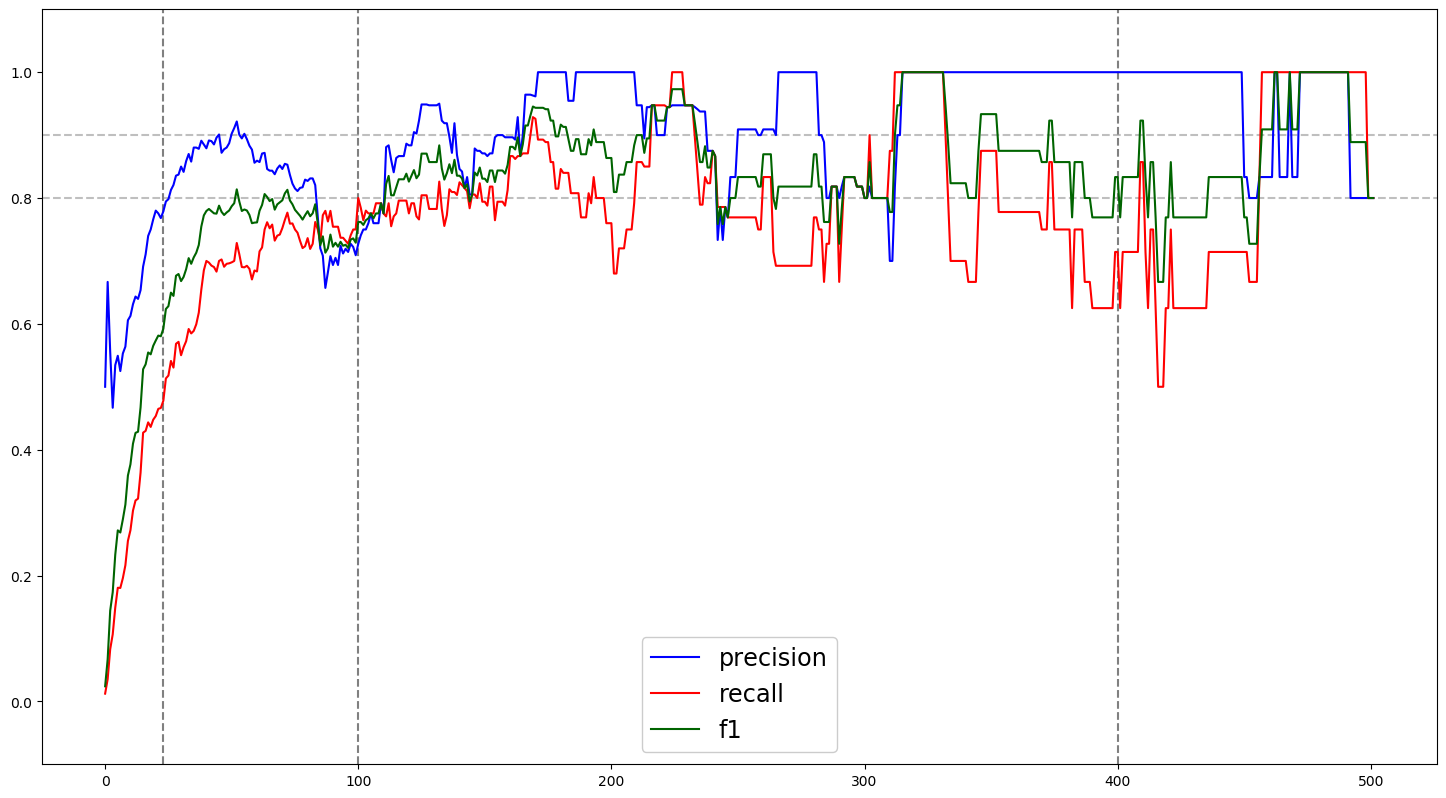

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axhline( y = 0.9 ,color = 'gray', linestyle = '--', alpha = 0.5)
axs.axhline( y = 0.8 ,color = 'gray', linestyle = '--', alpha = 0.5)

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['precision'], color = 'blue', label = 'precision')
axs.plot( time_records_table['time'], time_records_table['recall'], color = 'red', label = 'recall')
axs.plot( time_records_table['time'], time_records_table['f1'], color = 'darkgreen', label = 'f1')

axs.legend( loc = 'lower center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/prerec.png', dpi = 100, bbox_inches = 'tight')


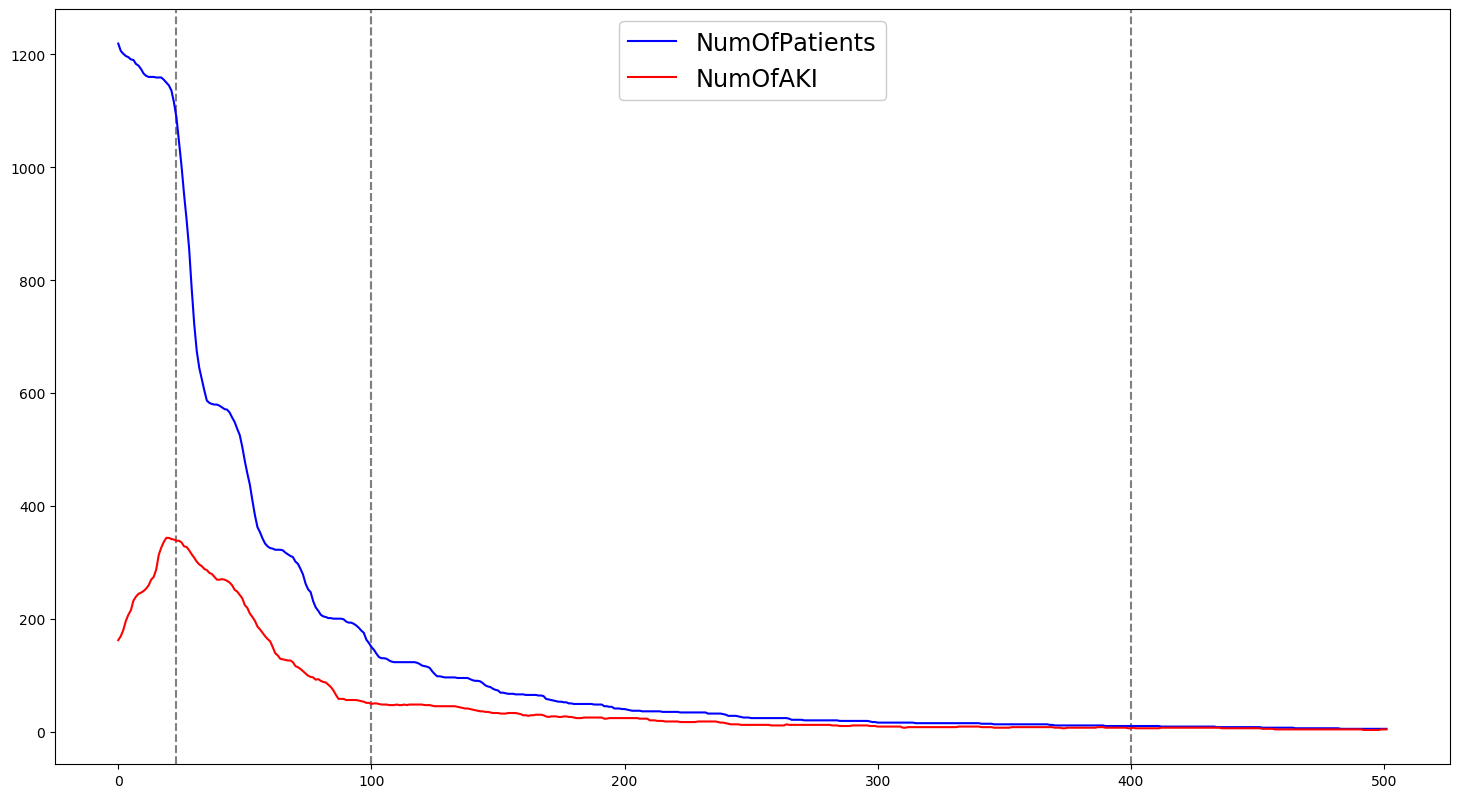

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
#axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axvline( x = 100, color = 'gray', linestyle = '--')

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['NumOfPatients'], color = 'blue', label = 'NumOfPatients')
axs.plot( time_records_table['time'], time_records_table['NumOfAKI'], color = 'red', label = 'NumOfAKI')
axs.legend( loc = 'upper center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/ns.png', dpi = 100, bbox_inches = 'tight')


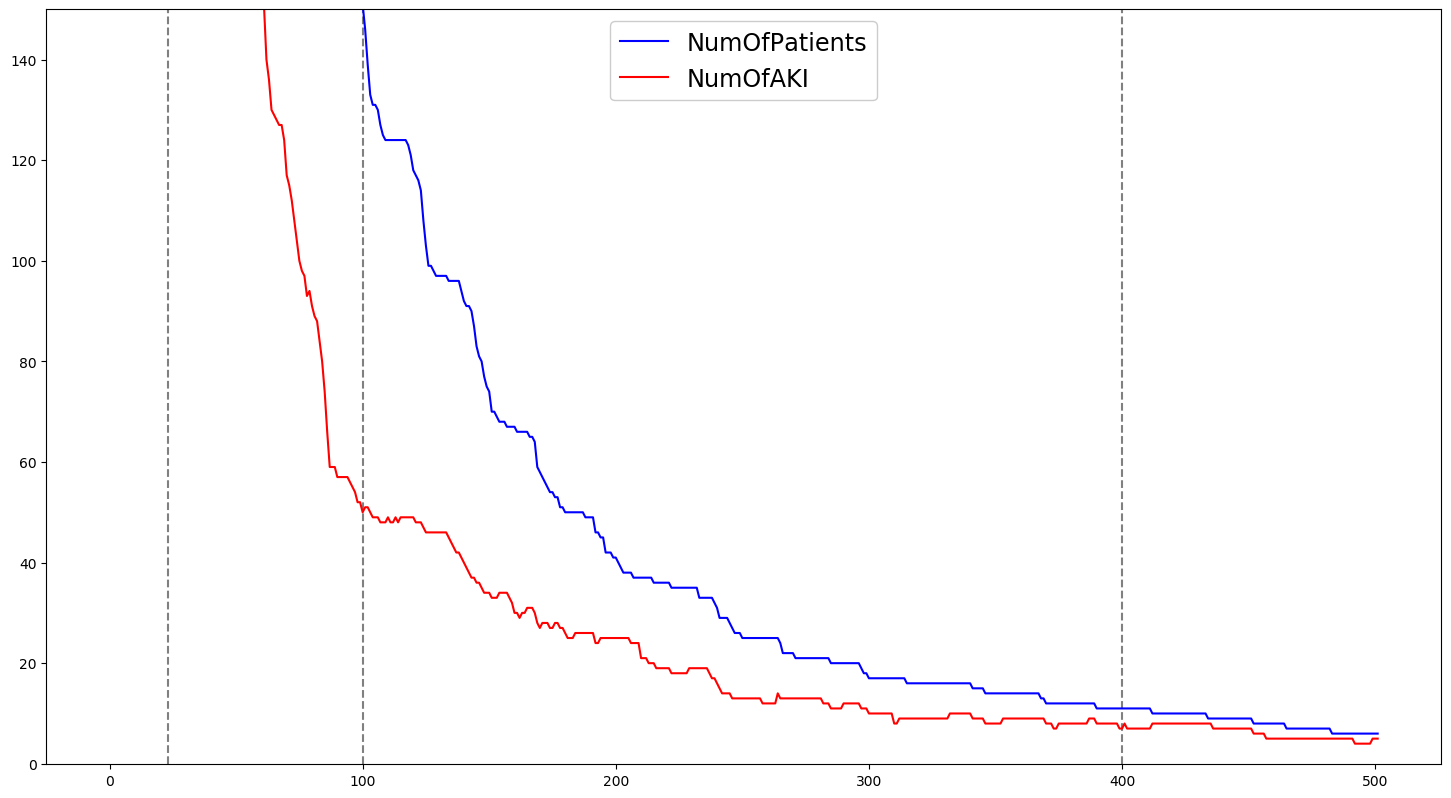

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,150])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['NumOfPatients'], color = 'blue', label = 'NumOfPatients')
axs.plot( time_records_table['time'], time_records_table['NumOfAKI'], color = 'red', label = 'NumOfAKI')
axs.legend( loc = 'upper center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/ns_100.png', dpi = 100, bbox_inches = 'tight')


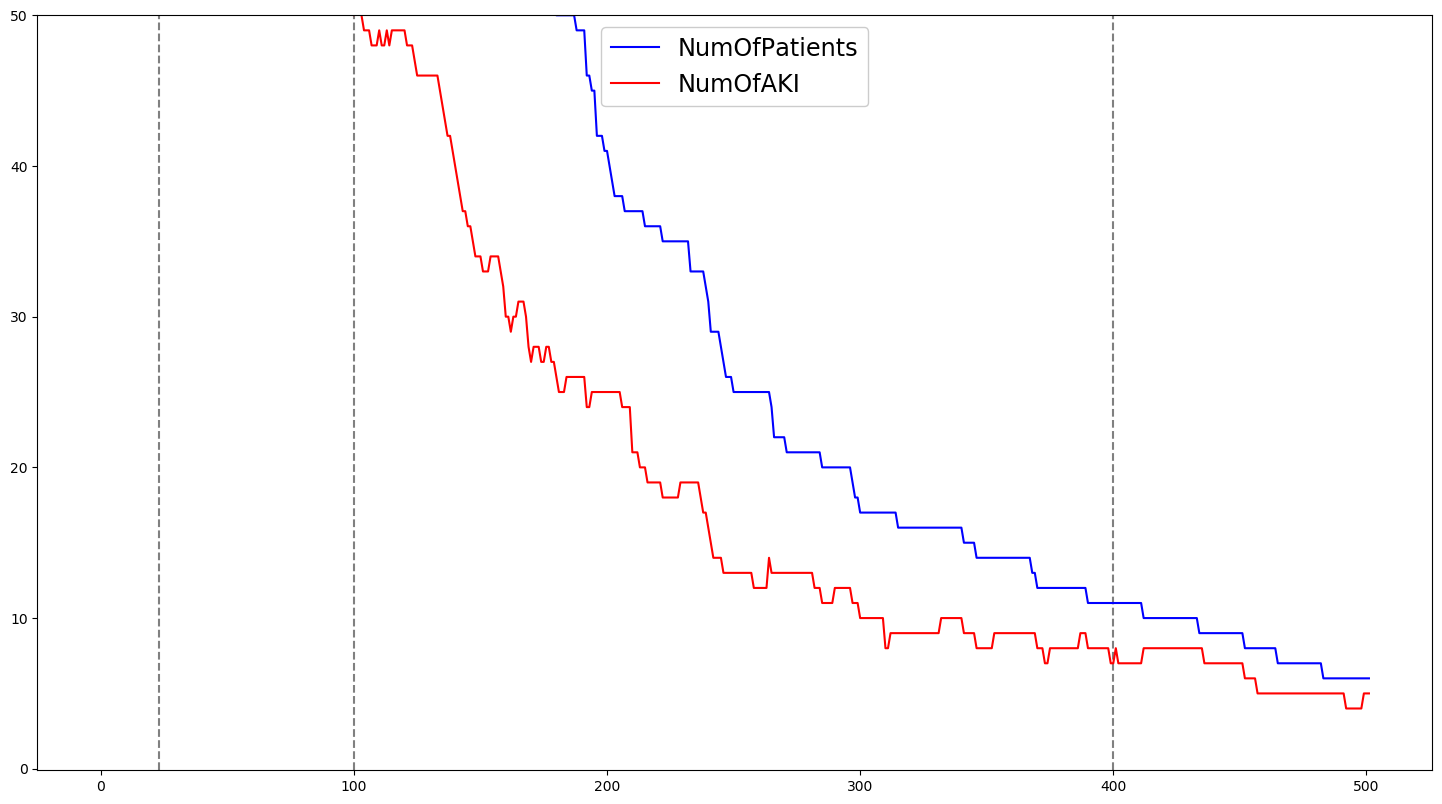

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,50])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['NumOfPatients'], color = 'blue', label = 'NumOfPatients')
axs.plot( time_records_table['time'], time_records_table['NumOfAKI'], color = 'red', label = 'NumOfAKI')
axs.legend( loc = 'upper center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/ns_400.png', dpi = 100, bbox_inches = 'tight')


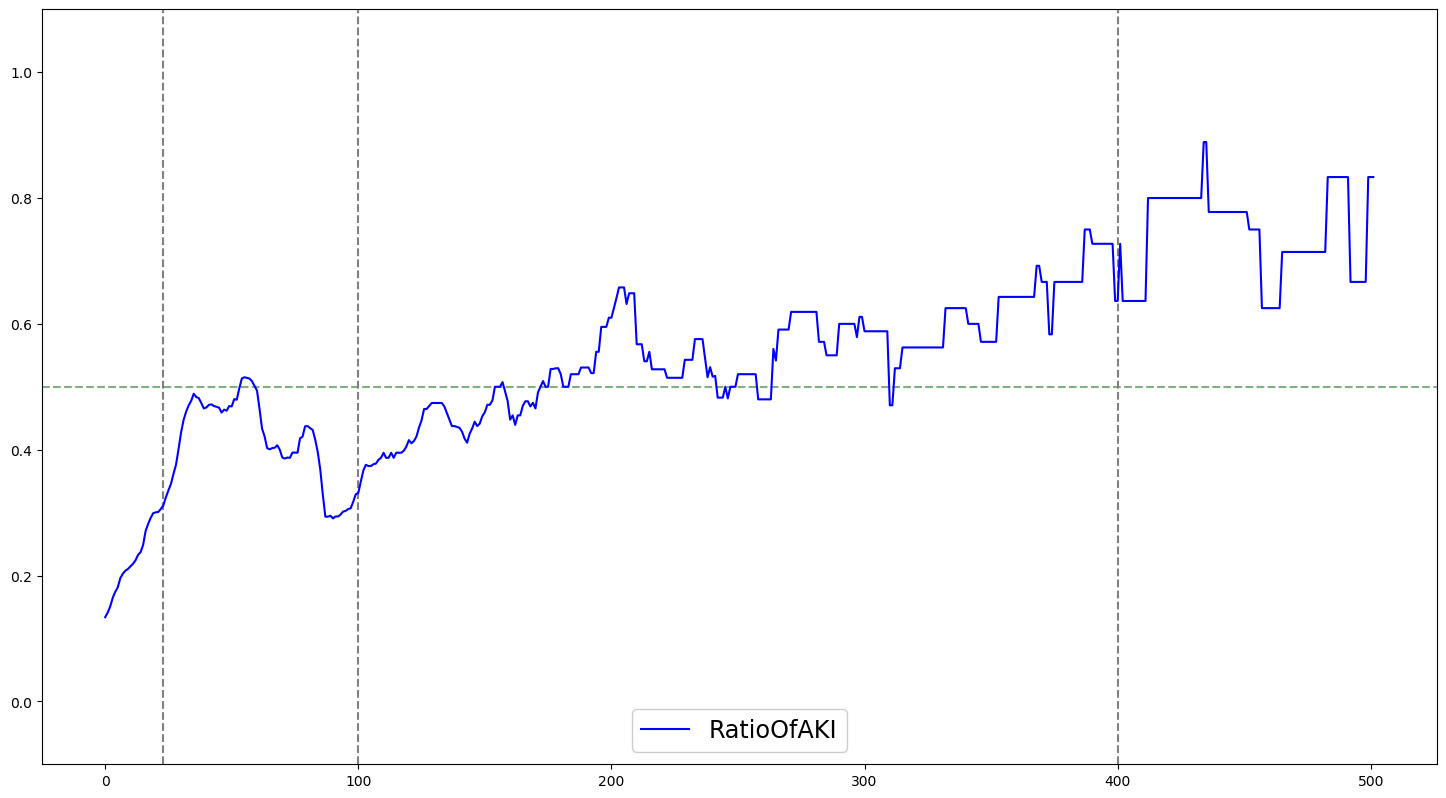

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,1, figsize = (18,10), dpi = 100)

#axs.set_title(r'Trace plots of $\pi_j$' )
axs.set_ylim([-0.1,1.1])
#axs.set_xlim([-10,(maxiter+10)])
axs.axvline( x = 23, color = 'gray', linestyle = '--')
axs.axhline( y = 0.5 ,color = 'darkgreen', linestyle = '--', alpha = 0.5)

axs.axvline( x = 100, color = 'gray', linestyle = '--')
axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs.plot( time_records_table['time'], time_records_table['RatioOfAKI'], color = 'blue', label = 'RatioOfAKI')
axs.legend( loc = 'lower center', framealpha = 1, fontsize = 'xx-large')

# plt.show()
plt.savefig( './plots/nsr.png', dpi = 100, bbox_inches = 'tight')


In [ ]:
hadm_list = np.unique( test['hadm_id']).astype('int')
inform = pd.read_pickle('./testing/inform.pkl')

In [ ]:

hat_y = pd.read_pickle('pred.pkl')
hadm_list = np.unique( test['hadm_id'])
tem_detect = pd.concat( [test[ ['hadm_id','time']], pd.DataFrame(hat_y) ], axis = 1)
updated_inform = pd.DataFrame( columns = ['hadm_id', 'if_AKI_in_ICU', 'first_AKI_detected', 'first_AKI_predicted']) 
for i in tqdm(hadm_list):
    if tem_detect.loc[ tem_detect['hadm_id'] == i, 'AKI_in_24'].max() == 0:
        new_inform = pd.DataFrame( data = np.append( inform.loc[ inform['hadm_id'] == i].values[0],  float('NaN')).reshape(1,-1),
                columns = ['hadm_id', 'if_AKI_in_ICU', 'first_AKI_detected', 'first_AKI_predicted'])
    else:
        new_inform = pd.DataFrame( data = np.append( inform.loc[ inform['hadm_id'] == i].values[0],  
                    tem_detect.loc[ (tem_detect['hadm_id'] == i) & (tem_detect['AKI_in_24'] == 1), 'time'].min()).reshape(1,-1),
            columns = ['hadm_id', 'if_AKI_in_ICU', 'first_AKI_detected', 'first_AKI_predicted'])
        
    updated_inform = pd.concat( [updated_inform, new_inform], ignore_index = True)

100%|██████████| 1219/1219 [00:06<00:00, 192.23it/s]


In [ ]:
early_detection = updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values 

In [ ]:
updated_inform.to_pickle('./updated_inform.pkl')

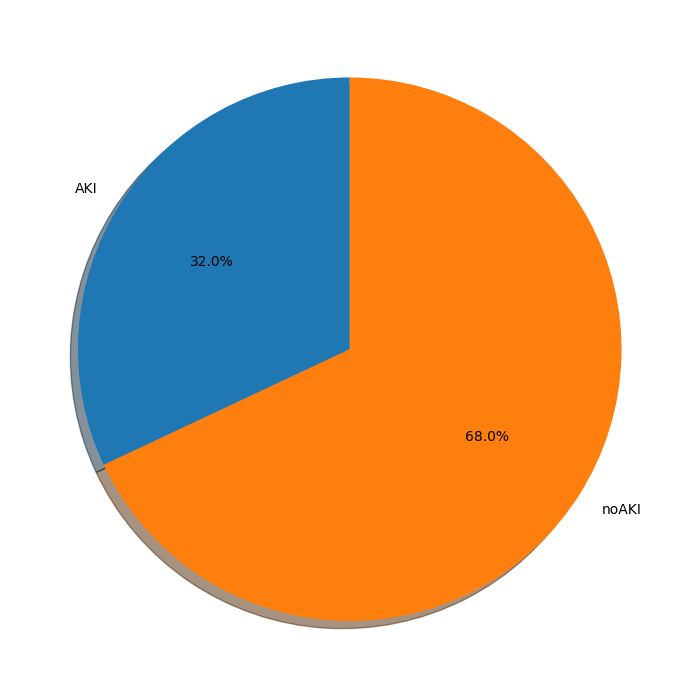

In [ ]:
%matplotlib inline

labels = 'AKI', 'noAKI'
sizes = [(updated_inform['if_AKI_in_ICU'] == 1).sum(), (updated_inform['if_AKI_in_ICU']==0).sum()]

fig, axs = plt.subplots(1,1, figsize = (9,9), dpi = 100)

axs.pie( sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


# plt.show()
plt.savefig( './plots/aki.png', dpi = 100, bbox_inches = 'tight')


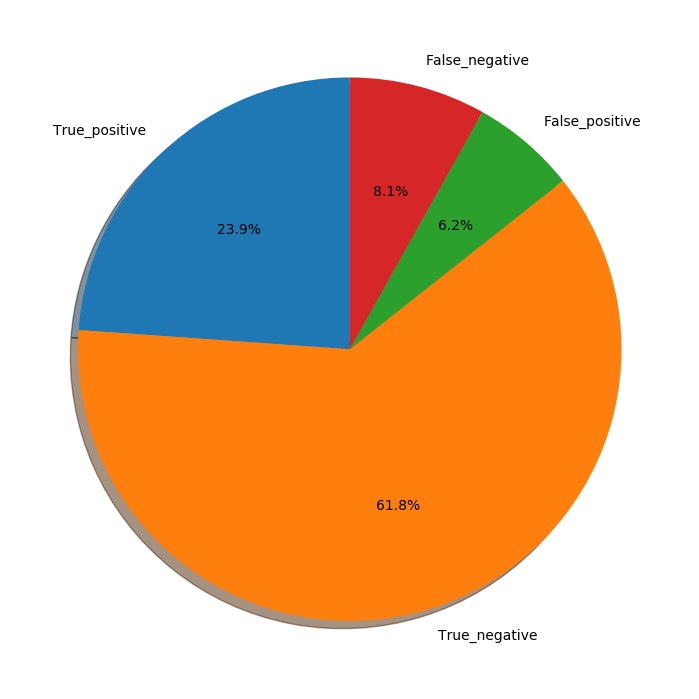

In [ ]:
%matplotlib inline

labels = 'True_positive', 'True_negative','False_positive', 'False_negative'
sizes = [((~updated_inform['first_AKI_detected'].isna()) & (~updated_inform['first_AKI_predicted'].isna())).sum(),
         ((updated_inform['first_AKI_detected'].isna()) & (updated_inform['first_AKI_predicted'].isna())).sum(),
         ((updated_inform['first_AKI_detected'].isna()) & (~updated_inform['first_AKI_predicted'].isna())).sum(),
         ((~updated_inform['first_AKI_detected'].isna()) & (updated_inform['first_AKI_predicted'].isna())).sum()]

fig, axs = plt.subplots(1,1, figsize = (9,9), dpi = 100)

axs.pie( sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


# plt.show()
plt.savefig( './plots/tpfn.png', dpi = 100, bbox_inches = 'tight')


In [ ]:
updated_inform.drop('if_AKI_in_ICU',axis = 1).dropna()

,hadm_id,first_AKI_detected,first_AKI_predicted
2,20017597.0,36.0,45.0
3,20022292.0,39.0,38.0
4,20022786.0,18.0,17.0
9,20044799.0,4.0,3.0
14,20100436.0,53.0,62.0
...,...,...,...
1202,29840380.0,16.0,15.0
1205,29879839.0,11.0,12.0
1208,29893682.0,32.0,31.0
1209,29910384.0,9.0,8.0


In [ ]:
early_detection = updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values

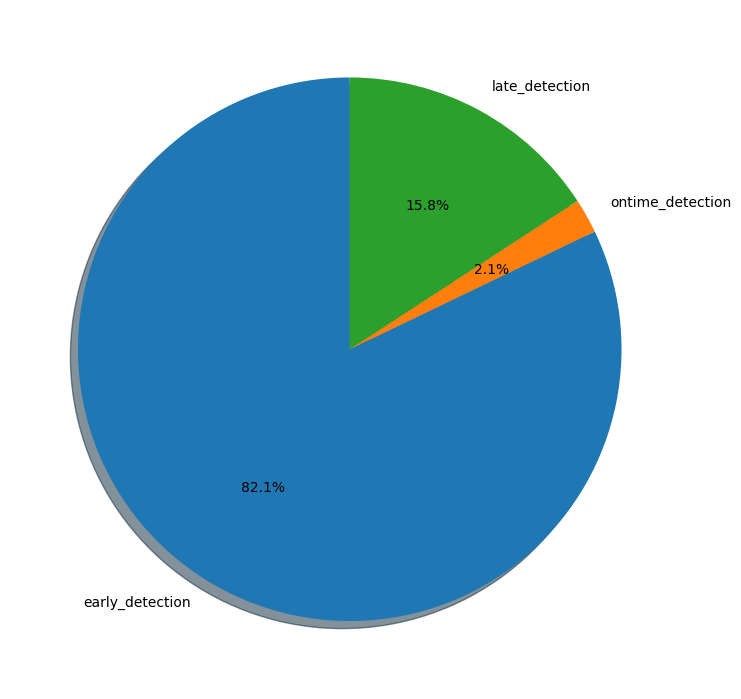

In [ ]:
%matplotlib inline

labels = 'early_detection', 'ontime_detection','late_detection'
sizes = [(early_detection > 0 ).sum(),
         (early_detection == 0).sum(),
         (early_detection < 0).sum()]

fig, axs = plt.subplots(1,1, figsize = (9,9), dpi = 100)

axs.pie( sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)


# plt.show()
plt.savefig( './plots/detection.png', dpi = 100, bbox_inches = 'tight')


In [ ]:
early_hours = []
frequency = []

In [ ]:
for i in np.unique(early_detection):
    early_hours.append(i)
    frequency.append( early_detection.tolist().count(i) )

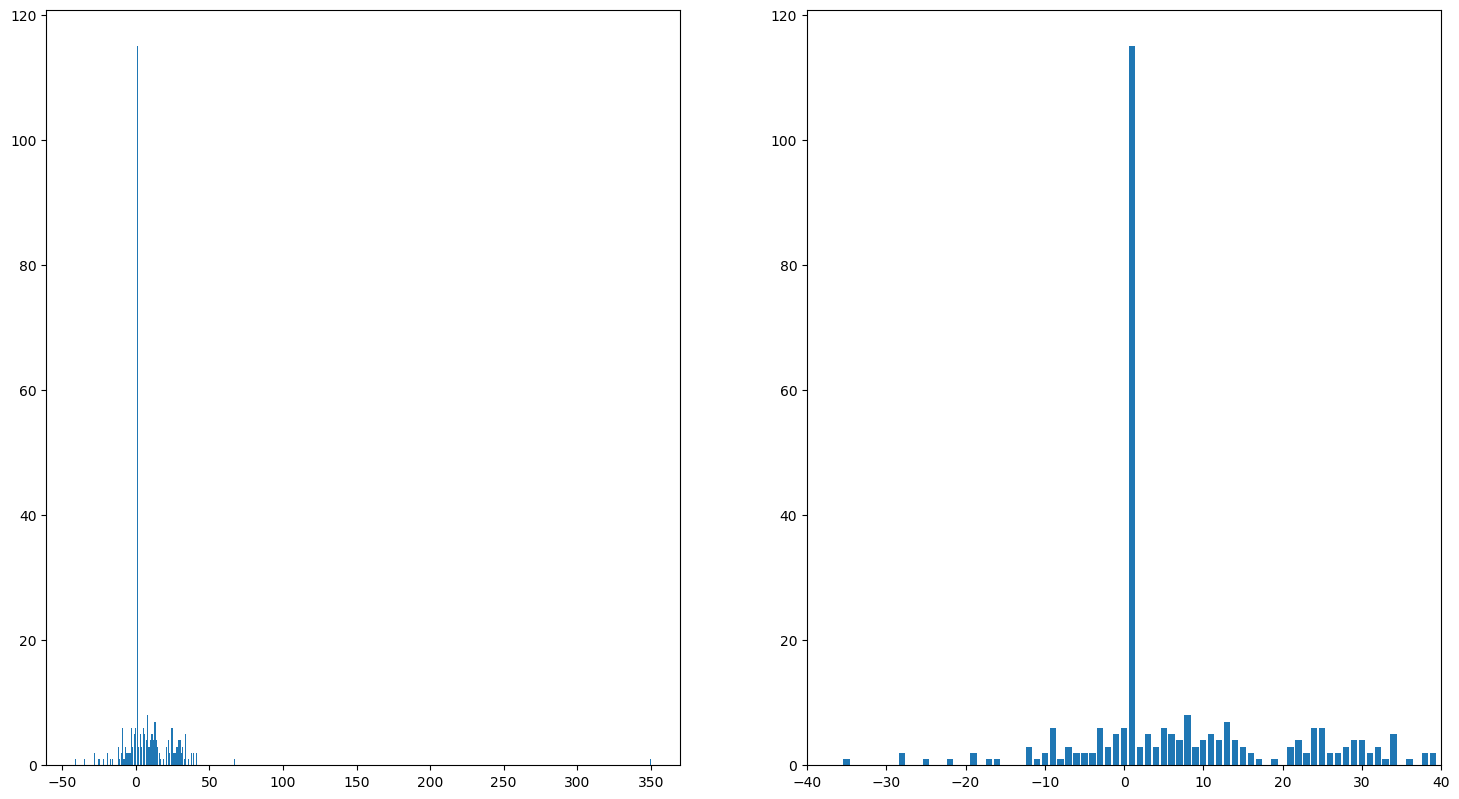

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize = (18,10), dpi = 100)

# axs.set_title(r'Trace plots of $\pi_j$' )
# axs.set_ylim([-0.1,1.1])
# axs.set_xlim([-10,(maxiter+10)])
# axs.axvline( x = 23, color = 'gray', linestyle = '--')
# axs.axhline( y = 0.5 ,color = 'darkgreen', linestyle = '--', alpha = 0.5)
# axs.axvline( x = 100, color = 'gray', linestyle = '--')
# axs.axvline( x = 400, color = 'gray', linestyle = '--')

axs[0].bar( early_hours, frequency)

axs[1].set_xlim([-40,40])
axs[1].bar( early_hours, frequency)
# plt.show()
plt.savefig( './plots/detect_hist.png', dpi = 10S0, bbox_inches = 'tight')


In [ ]:
 (updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values) <= 0

array([ True, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
updated_inform.dropna().loc[  (updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values) <= 1 ]

,hadm_id,if_AKI_in_ICU,first_AKI_detected,first_AKI_predicted
2,20017597.0,1.0,36.0,45.0
3,20022292.0,1.0,39.0,38.0
4,20022786.0,1.0,18.0,17.0
9,20044799.0,1.0,4.0,3.0
14,20100436.0,1.0,53.0,62.0
...,...,...,...,...
1202,29840380.0,1.0,16.0,15.0
1205,29879839.0,1.0,11.0,12.0
1208,29893682.0,1.0,32.0,31.0
1209,29910384.0,1.0,9.0,8.0


In [ ]:
np.mean( updated_inform.dropna().loc[  (updated_inform.dropna()['first_AKI_detected'].values - updated_inform.dropna()['first_AKI_predicted'].values) <= 1, 'first_AKI_detected' ] < 24)

0.5748502994011976